## Name: Divyansh Mohan & Kandarp Chaudhary
## Roll No.: D21013 & D21016

### Youtube links:
1) Divyansh Mohan: https://youtu.be/XiICDAj1ylM 

2) Kandarp Chaudhary: https://youtu.be/8orw7XzocAE


 A dataset that records the house prices of 9,761 houses in King County, Washington, US. The house prices are recorded along with some other attributes like - area of the house, number of bedrooms, number of bathrooms, etc

In [1]:
#Importing the necessary Libraries
import pandas as pd                                     #Pandas module mainly works with the tabular data             
import numpy as np                                      #NumPy module works with the numerical data
import seaborn as sns
import matplotlib.pyplot as plt                         #plotting libraries to plot the necessary graphs for EDA
import plotly.express as px                             #plotting libraries to plot the necessary graphs for EDA
import sklearn                                          #importing machine learning libraries
import statsmodels.api as stm   
from sklearn import linear_model
from sklearn.model_selection import cross_val_score     #for cross validation score calculation                       
from sklearn.tree import DecisionTreeRegressor          #for regression using decision tree
from sklearn.metrics import r2_score                    #to calculate R-squared value
from sklearn.model_selection import train_test_split    #for doing test & train split of data

### 1) Initial observations and hypothesis

Reading the training data and describing it. It helps to give us an overview of the data and the count for all columns also helps us to make sure that there are no missing values as the count is same for all columns i.e.9761 

In [2]:
data = pd.read_csv("kc_house_train_data.csv")
data.describe()

id         price     bedrooms    bathrooms   sqft_living  \
count  9.761000e+03  9.761000e+03  9761.000000  9761.000000   9761.000000   
mean   4.605288e+09  5.428336e+05     3.375884     2.117175   2086.734146   
std    2.876044e+09  3.797779e+05     0.960697     0.773971    927.194303   
min    1.200019e+06  8.000000e+04     0.000000     0.000000    290.000000   
25%    2.126049e+09  3.200000e+05     3.000000     1.750000   1420.000000   
50%    3.905041e+09  4.500000e+05     3.000000     2.250000   1910.000000   
75%    7.338403e+09  6.490000e+05     4.000000     2.500000   2570.000000   
max    9.900000e+09  7.700000e+06    33.000000     8.000000  12050.000000   

           sqft_lot       floors   waterfront         view    condition  \
count  9.761000e+03  9761.000000  9761.000000  9761.000000  9761.000000   
mean   1.521526e+04     1.486067     0.008401     0.248028     3.415531   
std    4.126673e+04     0.532317     0.091275     0.787877     0.650552   
min    5.200000e+02     1.000000     0.000000     0.000000     1.000000   
25%    5.100000e+03     1.000000     0.000000     0.000000     3.000000   
50%    7.642000e+03     1.500000     0.000000     0.000000     3.000000   
75%    1.066000e+04     2.000000     0.000000     0.000000     4.000000   
max    1.651359e+06     3.500000     1.000000     4.000000     5.000000   

            grade   sqft_above  sqft_basement     yr_built  yr_renovated  \
count  9761.00000  9761.000000    9761.000000  9761.000000   9761.000000   
mean      7.66151  1793.291159     293.442987  1970.799508     86.066592   
std       1.18268   835.763817     442.612722    29.240009    405.417369   
min       1.00000   290.000000       0.000000  1900.000000      0.000000   
25%       7.00000  1190.000000       0.000000  1951.000000      0.000000   
50%       7.00000  1570.000000       0.000000  1975.000000      0.000000   
75%       8.00000  2230.000000     570.000000  1996.000000      0.000000   
max      13.00000  8860.000000    3480.000000  2015.000000   2015.000000   

            zipcode          lat         long  sqft_living15     sqft_lot15  
count   9761.000000  9761.000000  9761.000000    9761.000000    9761.000000  
mean   98077.790185    47.560052  -122.214322    1992.359697   12824.785165  
std       53.203594     0.140236     0.139895     687.322247   26518.337402  
min    98001.000000    47.155900  -122.514000     620.000000     660.000000  
25%    98033.000000    47.467800  -122.327000    1490.000000    5160.000000  
50%    98065.000000    47.572200  -122.229000    1840.000000    7660.000000  
75%    98117.000000    47.680400  -122.126000    2370.000000   10113.000000  
max    98199.000000    47.777600  -121.319000    5790.000000  560617.000000

**Initial Questions towards data column names:**

     1. What is grade for? 
     2. What is sqft_lot 15?
     3. What is sqft_living 15?

### Explaination of column names:

|Column Header|Meaning|
|:---|:---|
|id|	Identification|
|date|	Date sold|
|price|	Sale price|
|bedrooms|	Number of bedrooms|
|bathrooms|	Number of bathrooms|
|sqft_liv|	Size of living area in square feet|
|sqft_lot|	Size of the lot in square feet|
|floors|	Number of floors|
|waterfront|	‘1’ if the property has a waterfront, ‘0’ if not.|
|view|	An index from 0 to 4 of how good the view of the property was|
|condition|	Condition of the house, ranked from 1 to 5|
|grade|	Classification by construction quality which refers to the types of materials used and the quality of workmanship.Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value.|
|sqft_above|	Square feet above ground|
|sqft_basmt|	Square feet below ground|
|yr_built|	Year built|
|yr_renov|	Year renovated. ‘0’ if never renovated|
|zipcode|	5 digit zip code|
|lat|	Latitude|
|long|	Longitude|
|squft_liv15|	Average size of interior housing living space for the closest 15 houses, in square feet|
|squft_lot15|	Average size of land lots for the closest 15 houses, in square feet|

**Initial Hypotheses without doing EDA (Answers are written in () after EDA):**

     1. yr_built and price are negatively correlated (Wrong!, r=0.051759)
     2. Having waterfront increases view rating, considering other factors remains similar (Yes, r=0.402725)
     3. Price of the house will be positively correlated with condition (Wrong!, r=0.044732)
     4. Number of bedroom will be positively correlated with number of bathroom (Yes, r=0.506070)
     5. Sqft_above will be positively correlated with number of bedroom (Yes, r=0.534801)
     6. id is unique number (there are 41 duplicate entries in id)
     7. id is not correlated with any column (Yes, id is not strongly correlated to any column)
     8. sq_ft is positively correlated with price (Wrong!, r=0.094143)
     9. Grade and house price are positively correlated (Yes, r=0.665567)
     10. zipcode and price are positively correlated (Wrong!, r=-0.055629)
     11. Number of bedrooms and price are positively correlated (Yes, r=0.300808)   
*r = Pearson's correlation coefficient

### 2) Exploratory Data Analysis

We have stored the continuous numeric columns from the dataframe in variable df_cont and the categorical numeric columns in df_cat.

In [3]:
df_cat = data.loc[:,['bedrooms','bathrooms','floors','waterfront','view','condition','grade','zipcode']]      #categorical columns
df_cont = data.loc[:,['id','price','sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built','yr_renovated','sqft_living15','sqft_lot15','lat','long']]  #numerical columns

**Univariate Analysis**

We are plotting the barplots for all categorical columns stored in the df_cat variable.

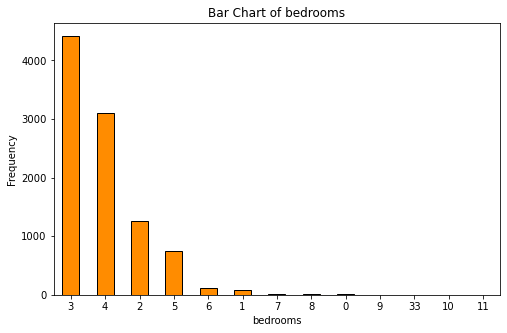

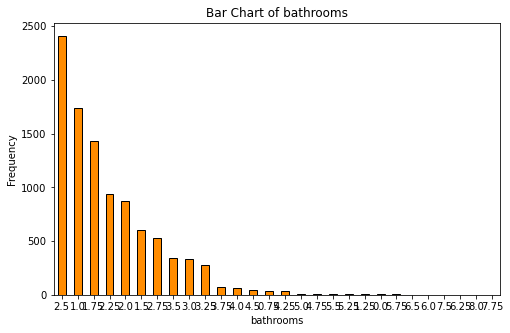

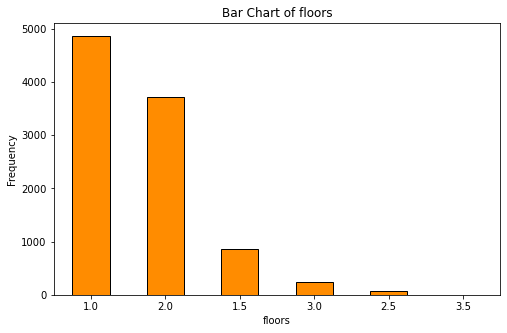

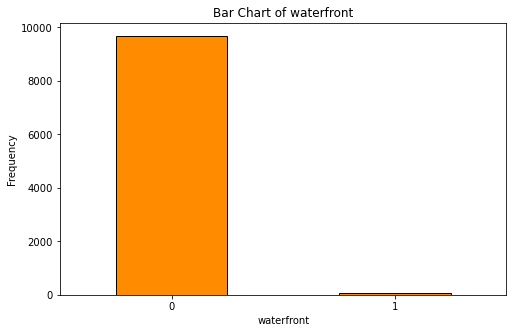

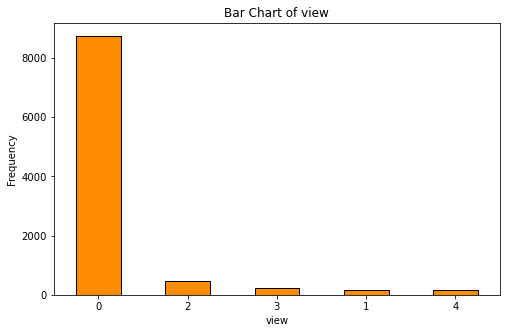

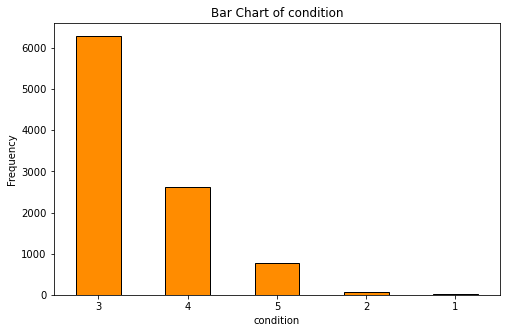

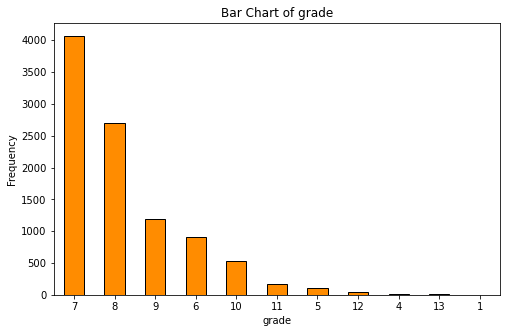

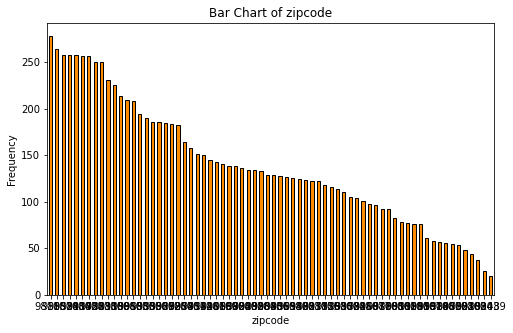

In [4]:
for i in range(len(df_cat.columns)):
    plt.figure(figsize=(8,5))                           #defining the figure size
    df_cat.iloc[:,i].value_counts().plot(kind='bar', edgecolor='black', color='DarkOrange') #creating the bar chart
    plt.xticks(rotation = 0)                            #making X-axis labels horizontal
    plt.title("Bar Chart of "+df_cat.columns[i])        #assigning histogram title
    plt.xlabel(df_cat.columns[i])                       #assigning X-axis label
    plt.ylabel("Frequency")                             #assigning Y-axis label
    plt.show()

Similarly, we are plotting the boxplot and histogram for all continuous numeric columns from the df_cont variable.We are using the subplot function to add the Histogram and Boxplot of a column in one single figure.

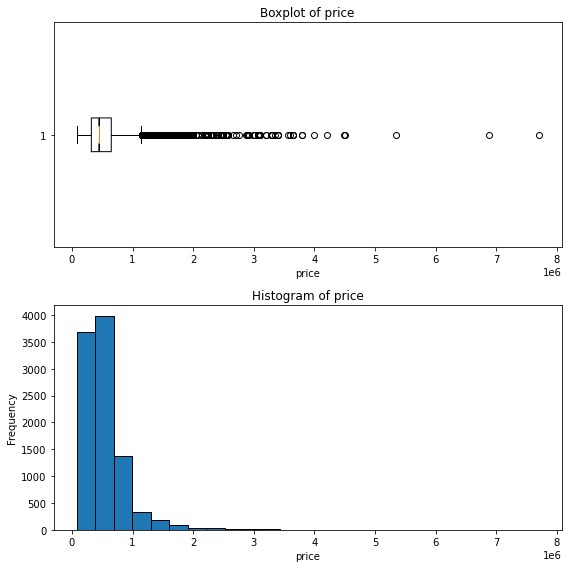

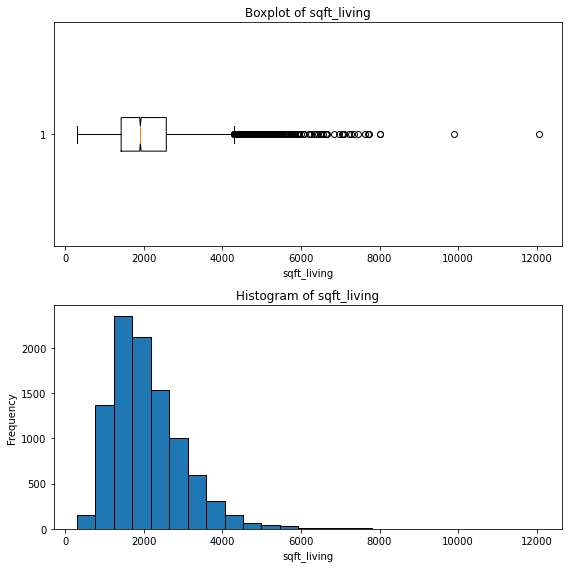

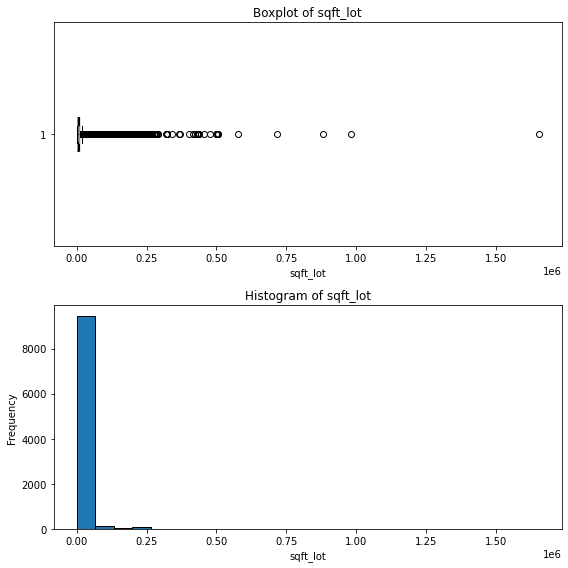

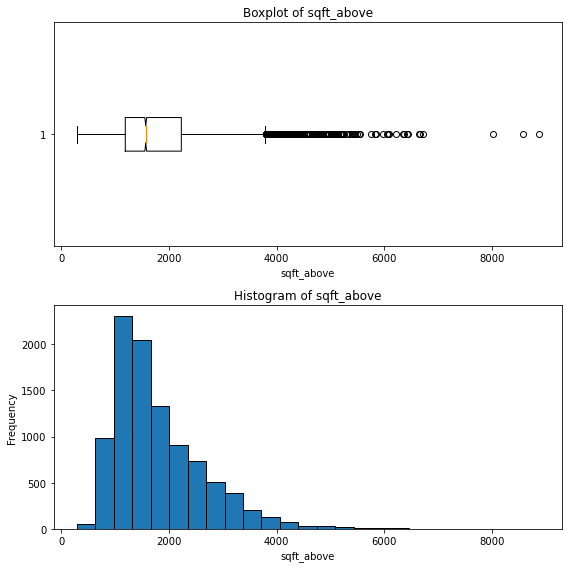

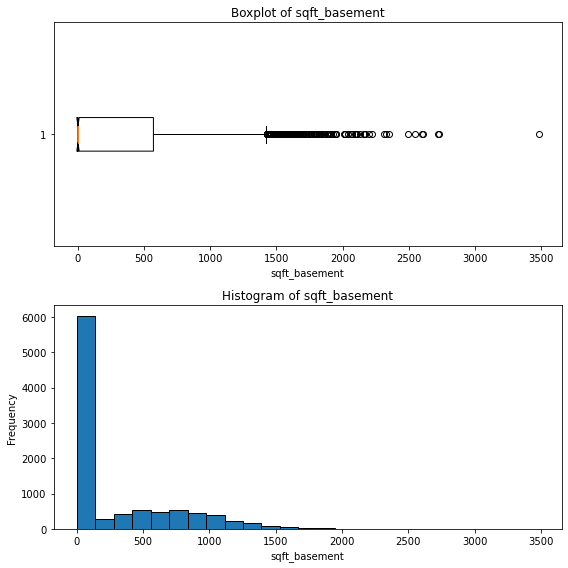

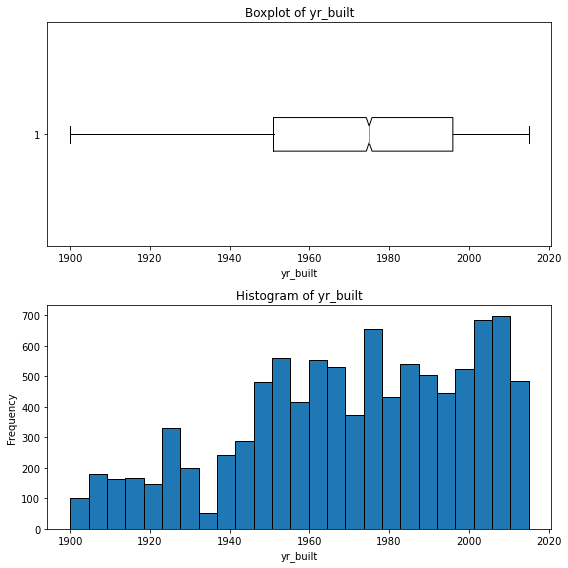

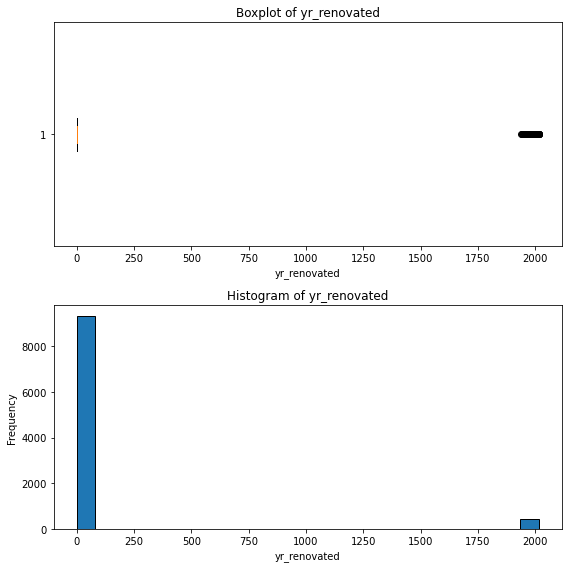

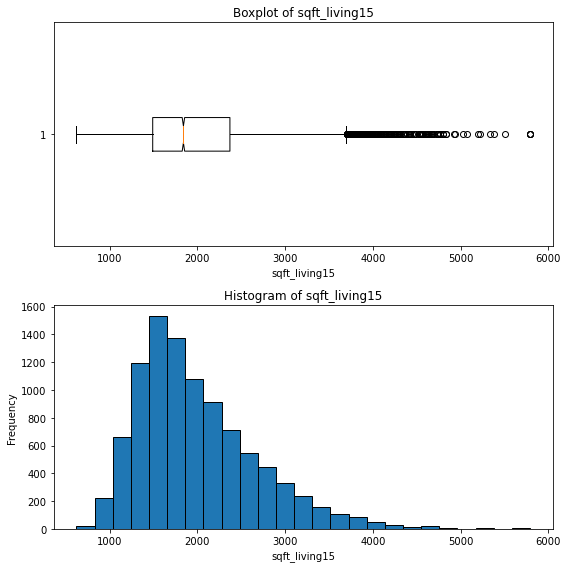

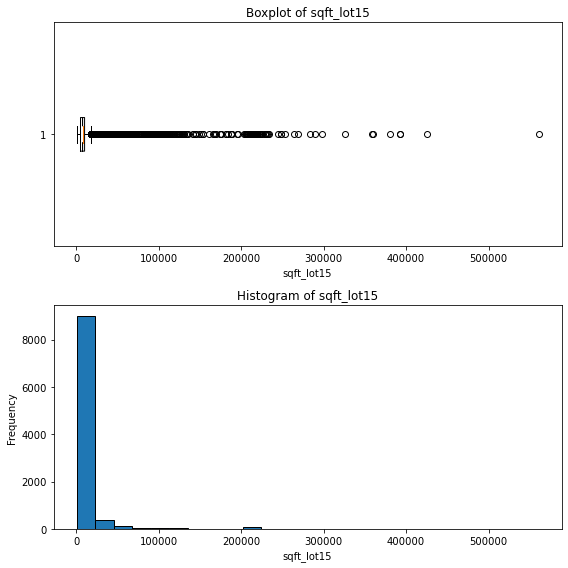

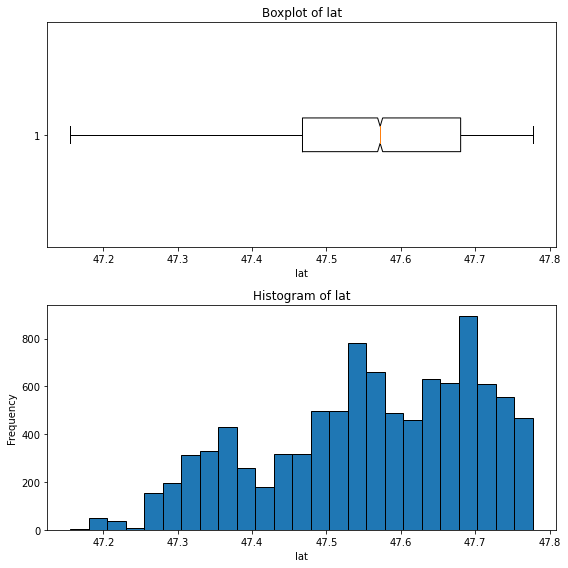

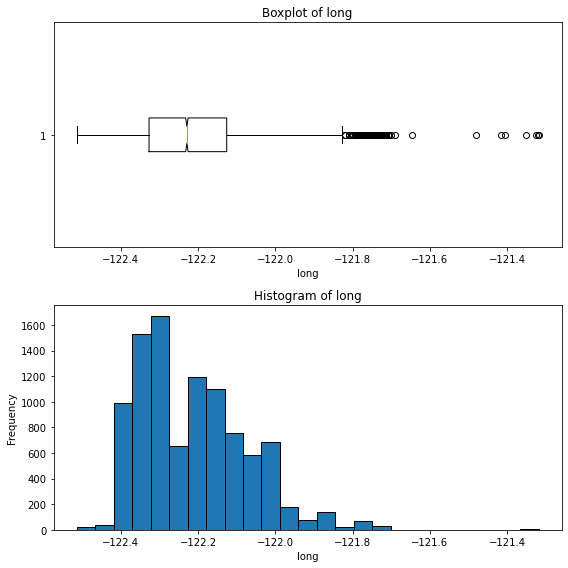

In [5]:
for i in range(1,len(df_cont.columns)):
    fig = plt.figure(figsize=(8,8),tight_layout = 1)    #plotting a figure
    fig1 = fig.add_subplot(2,1,1)                       #creating subplots to include boxplot and histogram in one image
    plt.boxplot(df_cont.iloc[:,i],vert=0,notch = 1)     #creating the boxplot
    plt.xlabel(df_cont.columns[i])                      #assigning X-axis label
    plt.title('Boxplot of %s'%df_cont.columns[i])       #assigning box plot title
    fig2 = fig.add_subplot(2,1,2)                       #creating subplots to include boxplot and histogram in one image
    plt.hist(df_cont.iloc[:,i],edgecolor = "black", bins = 25) #creating the histogram
    plt.xlabel(df_cont.columns[i])                      #assigning X-axis label
    plt.ylabel('Frequency')                             #assigning Y-axis label
    plt.title('Histogram of %s'%df_cont.columns[i])     #assigning histogram title
    plt.show()

**Bivariate Analysis**

Earlier we used one column at a time to plot the graphs which was Univariate analysis.Here we are comparing price column with all other columns  using a scatterplot.We have kept the colours different for categorical and continuous columns.

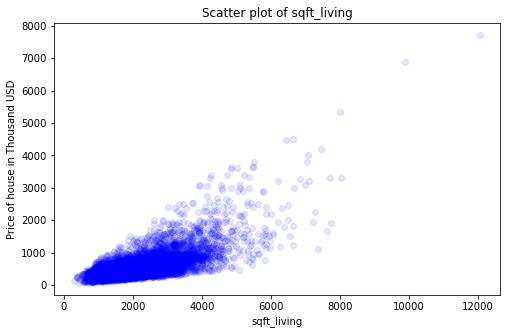

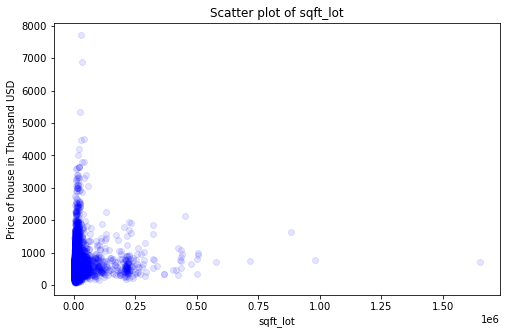

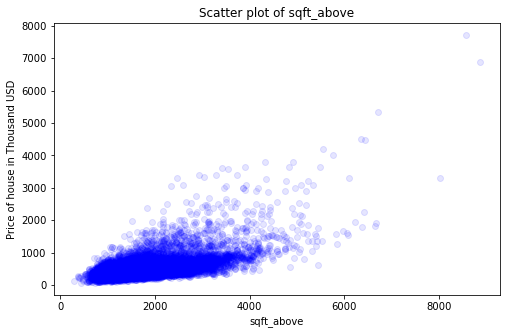

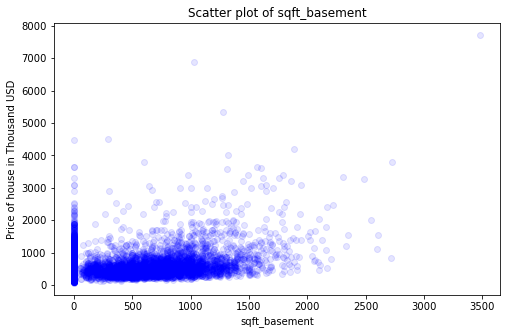

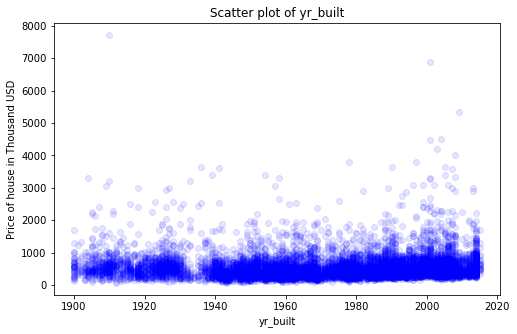

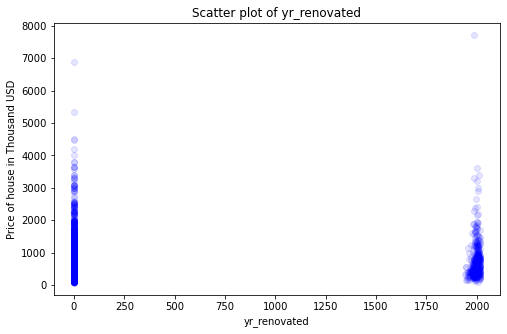

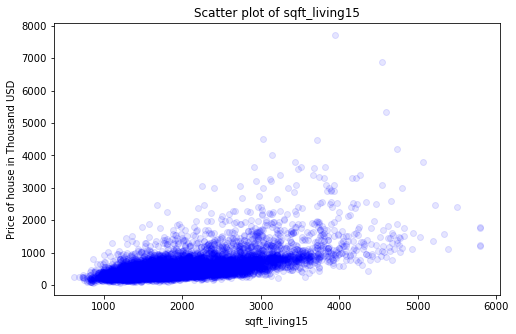

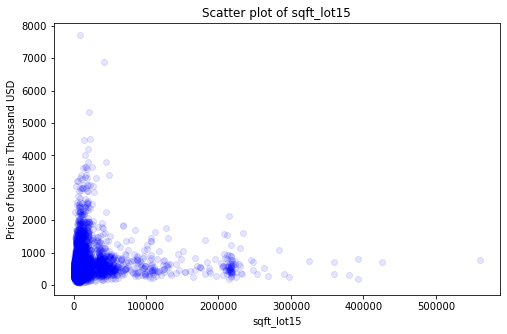

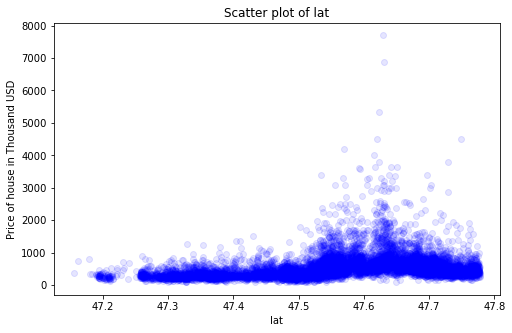

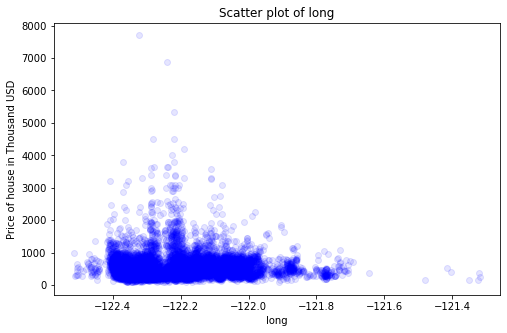

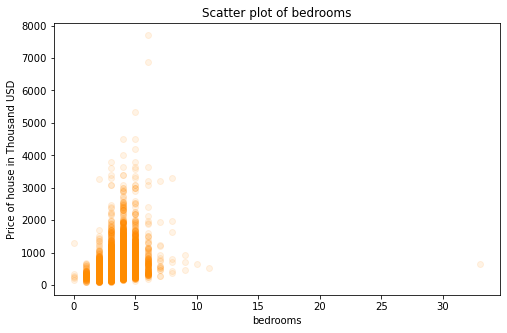

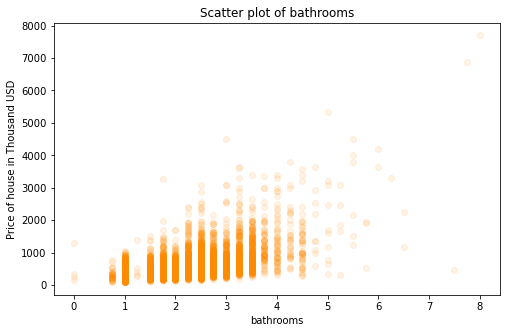

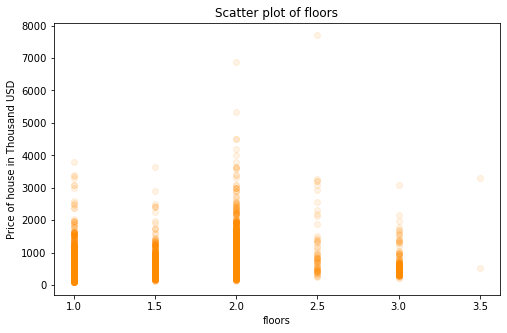

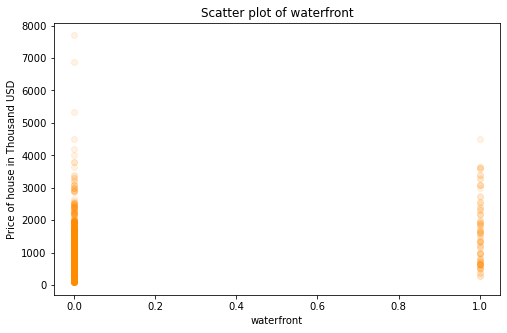

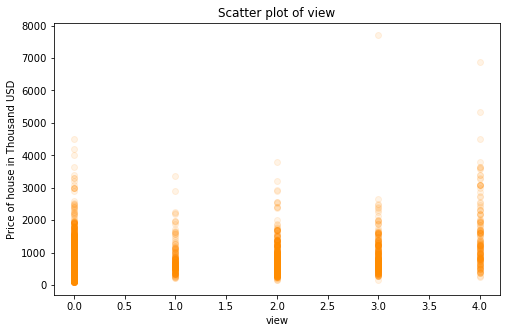

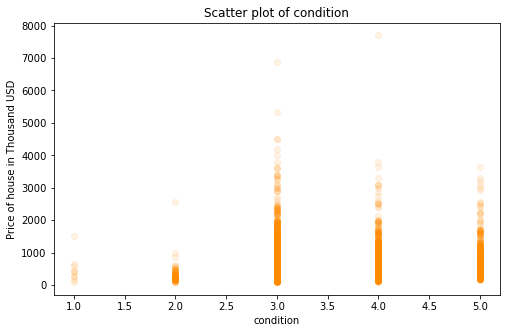

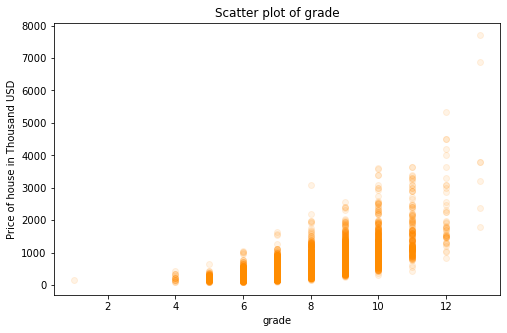

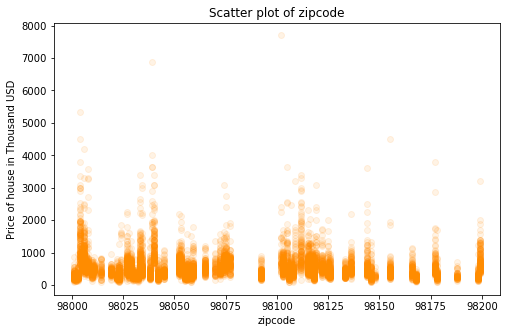

In [6]:
for i in range(2,len(df_cont.columns)):
    plt.figure(figsize=(8,5))
    plt.scatter(df_cont.iloc[:,i],(df_cont.price/1000),color='Blue',alpha=0.1)
    plt.xlabel(df_cont.columns[i])                      #assigning X-axis label
    plt.ylabel('Price of house in Thousand USD')        #assigning Y-axis label
    plt.title('Scatter plot of %s'%df_cont.columns[i])  #assigning Scatter plot title
    plt.show()
for i in range(len(df_cat.columns)):
    plt.figure(figsize=(8,5))
    plt.scatter(df_cat.iloc[:,i],(df_cont.price/1000),color='DarkOrange',alpha=0.1)
    plt.xlabel(df_cat.columns[i])                      #assigning X-axis label
    plt.ylabel('Price of house in Thousand USD')       #assigning Y-axis label
    plt.title('Scatter plot of %s'%df_cat.columns[i])  #assigning Scatter plot title
    plt.show()

Finding out the correlated columns with price which can be helpful in selecting our predictor variables

In [7]:
#finding out correlation between all columns
data.corr()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.006011 -0.002571   0.005821    -0.007559 -0.130303   
price         -0.006011  1.000000  0.300777   0.527512     0.705044  0.094146   
bedrooms      -0.002571  0.300777  1.000000   0.506070     0.560989  0.028895   
bathrooms      0.005821  0.527512  0.506070   1.000000     0.758930  0.079435   
sqft_living   -0.007559  0.705044  0.560989   0.758930     1.000000  0.162786   
sqft_lot      -0.130303  0.094146  0.028895   0.079435     0.162786  1.000000   
floors         0.007793  0.262955  0.181042   0.501899     0.366219 -0.003543   
waterfront     0.000834  0.274953 -0.006803   0.061483     0.097203  0.029420   
view           0.023355  0.399711  0.079863   0.182988     0.285735  0.099221   
condition     -0.015321  0.044754  0.036135  -0.115382    -0.047938 -0.008722   
grade          0.012491  0.665594  0.342305   0.660925     0.764819  0.115611   
sqft_above    -0.006447  0.611450  0.462514   0.692911     0.878989  0.180913   
sqft_basement -0.003660  0.322369  0.301829   0.281433     0.435069 -0.000601   
yr_built       0.027053  0.051737  0.155102   0.499589     0.322723  0.054043   
yr_renovated  -0.024900  0.120439  0.018625   0.044756     0.043627  0.001219   
zipcode       -0.012130 -0.055619 -0.148339  -0.201454    -0.203761 -0.126091   
lat            0.009167  0.299191 -0.010547   0.018453     0.054830 -0.092245   
long           0.034395  0.023718  0.117168   0.217697     0.240170  0.224524   
sqft_living15 -0.001315  0.584829  0.376457   0.566076     0.758081  0.145285   
sqft_lot15    -0.137562  0.077960  0.018149   0.068722     0.163545  0.719922   

                 floors  waterfront      view  condition     grade  \
id             0.007793    0.000834  0.023355  -0.015321  0.012491   
price          0.262955    0.274953  0.399711   0.044754  0.665594   
bedrooms       0.181042   -0.006803  0.079863   0.036135  0.342305   
bathrooms      0.501899    0.061483  0.182988  -0.115382  0.660925   
sqft_living    0.366219    0.097203  0.285735  -0.047938  0.764819   
sqft_lot      -0.003543    0.029420  0.099221  -0.008722  0.115611   
floors         1.000000    0.022443  0.031938  -0.265390  0.461545   
waterfront     0.022443    1.000000  0.402725   0.024030  0.088039   
view           0.031938    0.402725  1.000000   0.059969  0.258123   
condition     -0.265390    0.024030  0.059969   1.000000 -0.133313   
grade          0.461545    0.088039  0.258123  -0.133313  1.000000   
sqft_above     0.534801    0.064297  0.170286  -0.153713  0.756226   
sqft_basement -0.242675    0.082214  0.277021   0.189828  0.174216   
yr_built       0.481926   -0.027010 -0.056361  -0.357396  0.447817   
yr_renovated   0.013655    0.101684  0.109750  -0.055525  0.013053   
zipcode       -0.064479    0.023656  0.075834   0.003410 -0.187340   
lat            0.044827   -0.009410  0.005503  -0.017622  0.107977   
long           0.134683   -0.039227 -0.074630  -0.106514  0.201114   
sqft_living15  0.289238    0.097196  0.292435  -0.080423  0.717835   
sqft_lot15    -0.013269    0.028499  0.079904   0.002253  0.118618   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id              -0.006447      -0.003660  0.027053     -0.024900 -0.012130   
price            0.611450       0.322369  0.051737      0.120439 -0.055619   
bedrooms         0.462514       0.301829  0.155102      0.018625 -0.148339   
bathrooms        0.692911       0.281433  0.499589      0.044756 -0.201454   
sqft_living      0.878989       0.435069  0.322723      0.043627 -0.203761   
sqft_lot         0.180913      -0.000601  0.054043      0.001219 -0.126091   
floors           0.534801      -0.242675  0.481926      0.013655 -0.064479   
waterfront       0.064297       0.082214 -0.027010      0.101684  0.023656   
view             0.170286       0.277021 -0.056361      0.109750  0.075834   
condition       -0.153713       0.189828 -0.357396     -0.055525  0.

**Plotting scatter plot for the columns having some correlation.We are dropping the columns which show weak correlation with price**

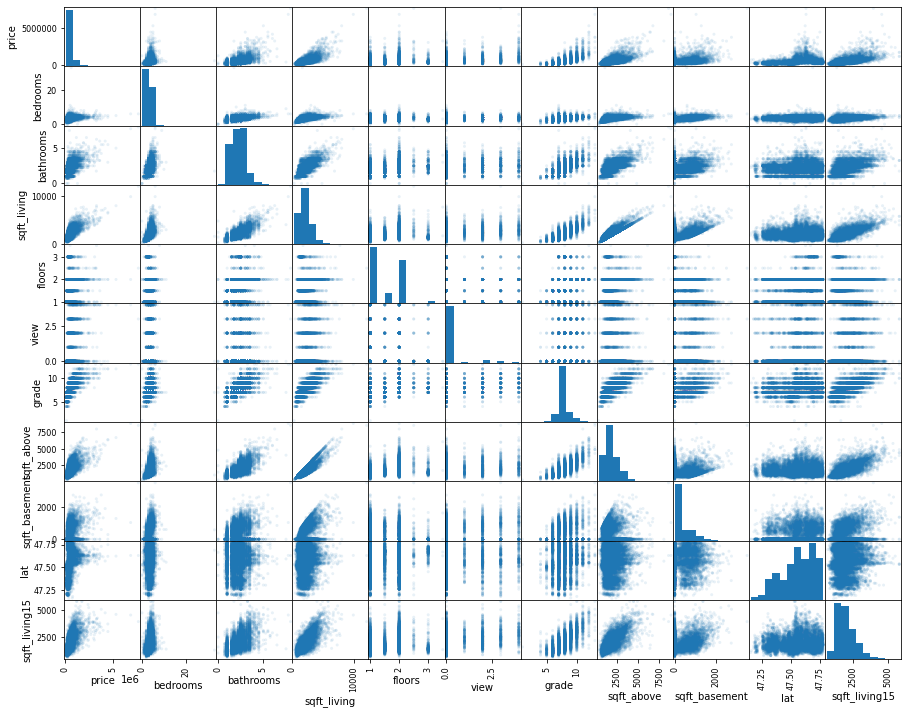

In [8]:
pd.plotting.scatter_matrix(data.drop(["long","condition","id","yr_renovated","waterfront","zipcode","yr_built","yr_renovated","zipcode","sqft_lot","sqft_lot15"], axis=1),
                           alpha=0.1,       #used to set transperancy of dots
                           figsize=(15,12), 
                           diagonal='hist')
plt.show()

In [9]:
#41 ids are duplicate
print("No. of Duplicate id:",len(data.loc[data.id.duplicated()]))
data.loc[data.id.duplicated(),['id','date','price']]

No. of Duplicate id: 41


id             date      price
44    6021501535  20141223T000000   700000.0
166   2231500030  20150324T000000   530000.0
385   8682262400  20150513T000000   419950.0
865   2143700830  20150312T000000   370000.0
1163  1781500435  20150225T000000   575000.0
1176  1232000810  20150326T000000   537000.0
1188  7856400240  20150211T000000  1650000.0
1733  1254200015  20150408T000000   625000.0
1817  1825069031  20141016T000000   550000.0
2231  1524079093  20150318T000000   369500.0
2254  9809000020  20150313T000000  1940000.0
2396  7524400250  20141124T000000   589950.0
2596  1788800630  20150225T000000   185000.0
2710  1545800290  20150408T000000   315000.0
2883  9828200460  20150106T000000   430000.0
2896  9222400605  20150411T000000   850000.0
3015  3323059027  20150225T000000   340000.0
3560   251300110  20150114T000000   358000.0
4165  1568100300  20150121T000000   682500.0
4248  4443800385  20150506T000000   778100.0
4692  8945100320  20141008T000000   224097.0
5001  7227800055  20141124T000000   247000.0
5130  1139600270  20150324T000000   310000.0
5169  5101402435  20150304T000000   539000.0
5229   109200390  20141020T000000   250000.0
5896  2019200220  20150226T000000   269000.0
5986  1523049207  20150114T000000   220000.0
6244  1788900230  20150403T000000   199950.0
6944   705730280  20150421T000000   335000.0
7161  2044500213  20150126T000000   449000.0
7168  7129304540  20150514T000000   440000.0
7855  2473380920  20150227T000000   339000.0
7991   795000620  20141215T000000   124000.0
7992   795000620  20150311T000000   157000.0
8067  1630700361  20150409T000000   583500.0
8100  6791200120  20150407T000000   515000.0
8517  3332000615  20150422T000000   389000.0
8787  6021500970  20150407T000000   874950.0
9334  2724049222  20141201T000000   220000.0
9358  8564860270  20150330T000000   502000.0
9740  7853420110  20150504T000000   625000.0

**EDA Observations:**

     1. sqft above + sqft basement = sqft living
     2. Most houses never renovated.
     3. Most houses don't have waterfront.
     4. Each Zipcode does not have unique longitude and latitude.

### 3) Fitting the Linear Regression model

**i) Simple Linear Regression**

Creating a simple Linear Regression model where we our fixing our target variable to price and through a for loop we are iterating through all the columns in the dataset and finding out the cross validation score for R-square,RMSE and MAE metrics.

In [10]:
SLR_list = []                                   #creating a list to store tuple of predictor,R-square,RMSE and MAE.
regr = linear_model.LinearRegression()          #initializing the sklearn linear regression model
for i in range(3,np.shape(data.columns)[0]):    #iterating through all columns of dataset except id,date and price.
    scores1 = cross_val_score(regr,pd.DataFrame(data.iloc[:,i]),pd.DataFrame(data.price),cv=10,scoring='r2')                          #cv score with R-square metric
    scores2 = cross_val_score(regr,pd.DataFrame(data.iloc[:,i]),pd.DataFrame(data.price),cv=10,scoring='neg_root_mean_squared_error') #cv score with RMSE metric
    scores3 = cross_val_score(regr,pd.DataFrame(data.iloc[:,i]),pd.DataFrame(data.price),cv=10,scoring='neg_mean_absolute_error')     #cv score with MAE metric
    SLR_list.append([data.columns[i],scores1.mean(),np.abs(scores2.mean()),np.abs(scores3.mean())])   #appending  the list to store tuple of predictor,R-square,RMSE and MAE.
SLR_Result = pd.DataFrame(SLR_list, columns = ["Predictor","R2","RMSE","MAE"])  #conerting the list to pandas dataframe
SLR_Result = SLR_Result.sort_values("R2")       #sorting a dataframe by R2 column
SLR_Result 

Predictor        R2           RMSE            MAE
15           long -0.003174  377994.674075  238224.754864
7       condition -0.001935  377761.942578  238183.524927
13        zipcode -0.001061  377574.144805  238411.864207
11       yr_built -0.000835  377575.135887  238341.718481
17     sqft_lot15  0.002081  376987.326715  237637.578700
3        sqft_lot  0.003887  376589.941026  237076.526265
12   yr_renovated  0.009222  375547.662440  236910.690512
4          floors  0.061698  365413.426315  228658.937518
5      waterfront  0.067348  364082.999642  233325.550638
0        bedrooms  0.084768  361006.917396  224933.393727
14            lat  0.088712  360496.359603  217289.011688
10  sqft_basement  0.096234  358445.256532  229864.617990
6            view  0.152593  347013.632948  222460.126004
1       bathrooms  0.269689  321944.559851  207978.564804
16  sqft_living15  0.339800  306513.520487  190232.715721
9      sqft_above  0.365034  300116.804769  195636.793854
8           grade  0.438255  282621.049600  179358.499214
2     sqft_living  0.489708  268870.092767  177464.440551

Plotting the Horizontal bar plot for R-square value that we got. 

In [11]:
px.bar(y=SLR_Result['Predictor'],x=SLR_Result['R2'],labels={'y':'Predictor','x':'R2'})

Creating a new Dataframe which consist of predictors in decreasing order of R-Square value in their respective simple regression model.

In [12]:
SLR_list = list(SLR_Result.iloc[:,0])  #slicing the predictor column from SLR_Result dataframe
SLR_list.append('price')               #appending the price to SLR_List    
SLR_list.reverse()                     #reversing the list elements
df_1 = data.loc[:,SLR_list]            #creating a dataframe with SLR_List elements as columns
df_1


price  sqft_living  grade  sqft_above  sqft_living15  bathrooms  \
0      604000.0         1960      7        1050           1360       3.00   
1     1230000.0         5420     11        3890           4760       4.50   
2      468000.0         1160      7         860           1330       1.00   
3      310000.0         1430      7        1430           1780       1.00   
4      400000.0         1370      7        1370           1370       1.75   
...         ...          ...    ...         ...            ...        ...   
9756   429000.0         1490      8        1490           1400       2.00   
9757   610685.0         2520      9        2520           2520       2.50   
9758  1010000.0         3510      9        2600           2050       3.50   
9759   402101.0         1020      7        1020           1020       0.75   
9760   325000.0         1020      7        1020           1020       0.75   

      view  sqft_basement      lat  bedrooms  waterfront  floors  \
0        0            910  47.5208         4           0     1.0   
1        0           1530  47.6561         4           0     1.0   
2        0            300  47.6900         2           0     1.0   
3        0              0  47.7558         3           0     1.5   
4        0              0  47.6127         3           0     1.0   
...    ...            ...      ...       ...         ...     ...   
9756     0              0  47.5699         3           0     3.0   
9757     0              0  47.5137         4           0     2.0   
9758     0            910  47.5537         4           0     2.0   
9759     0              0  47.5944         2           0     2.0   
9760     0              0  47.5941         2           0     2.0   

      yr_renovated  sqft_lot  sqft_lot15  yr_built  zipcode  condition  \
0                0      5000        5000      1965    98136          5   
1                0    101930      101930      2001    98053          3   
2                0      6000        6000      1942    98115          4   
3                0     19901       12697      1927    98028          4   
4                0      9680       10208      1977    98074          4   
...            ...       ...         ...       ...      ...        ...   
9756             0      1126        1230      2014    98144          3   
9757             0      6023        6023      2014    98056          3   
9758             0      7200        6200      2009    98136          3   
9759             0      1350        2007      2009    98144          3   
9760             0      1076        1357      2008    98144          3   

         long  
0    -122.393  
1    -122.005  
2    -122.292  
3    -122.229  
4    -122.045  
...       ...  
9756 -122.288  
9757 -122.167  
9758 -122.398  
9759 -122.299  
9760 -122.299  

[9761 rows x 19 columns]

**ii) Multiple Linear Regression**

Creating a Multiple Linear Regression model where we our fixing our target variable to price and through a for loop we are adding a new predictor in each iteration and finding out the cross validation score for R-square,RMSE and MAE metrics. We are making a DataFrame which consists of predictors used and the cv score metrics.

In [13]:
MLR_list = []                                   #creating a list to store tuple of predictor,R-square,RMSE and MAE.
regr = linear_model.LinearRegression()          #initializing the sklearn linear regression model
for i in range(2,np.shape(df_1.columns)[0]+1):  #iterating through all columns of dataset df_1 except price
    scores1 = cross_val_score(regr,df_1.iloc[:,1:i],pd.DataFrame(df_1.price),cv=10,scoring='r2')                          #cv score with R-square metric
    scores2 = cross_val_score(regr,df_1.iloc[:,1:i],pd.DataFrame(df_1.price),cv=10,scoring='neg_root_mean_squared_error') #cv score with RMSE metric
    scores3 = cross_val_score(regr,df_1.iloc[:,1:i],pd.DataFrame(df_1.price),cv=10,scoring='neg_mean_absolute_error')     #cv score with MAE metric
    MLR_list.append([list(df_1.columns[1:i]),scores1.mean(),np.abs(scores2.mean()),np.abs(scores3.mean())])  #appending  the list to store tuple of predictor,R-square,RMSE and MAE.
MLR_Result = pd.DataFrame(MLR_list, columns = ["Predictor","R2","RMSE","MAE"])    #conerting the list to pandas dataframe
MLR_Result

Predictor        R2  \
0                                       [sqft_living]  0.489708   
1                                [sqft_living, grade]  0.529314   
2                    [sqft_living, grade, sqft_above]  0.535014   
3     [sqft_living, grade, sqft_above, sqft_living15]  0.534584   
4   [sqft_living, grade, sqft_above, sqft_living15...  0.536761   
5   [sqft_living, grade, sqft_above, sqft_living15...  0.568585   
6   [sqft_living, grade, sqft_above, sqft_living15...  0.568585   
7   [sqft_living, grade, sqft_above, sqft_living15...  0.630005   
8   [sqft_living, grade, sqft_above, sqft_living15...  0.631816   
9   [sqft_living, grade, sqft_above, sqft_living15...  0.650215   
10  [sqft_living, grade, sqft_above, sqft_living15...  0.651015   
11  [sqft_living, grade, sqft_above, sqft_living15...  0.654145   
12  [sqft_living, grade, sqft_above, sqft_living15...  0.653991   
13  [sqft_living, grade, sqft_above, sqft_living15...  0.654510   
14  [sqft_living, grade, sqft_above, sqft_living15...  0.684155   
15  [sqft_living, grade, sqft_above, sqft_living15...  0.686262   
16  [sqft_living, grade, sqft_above, sqft_living15...  0.687708   
17  [sqft_living, grade, sqft_above, sqft_living15...  0.691818   

             RMSE            MAE  
0   268870.092767  177464.440551  
1   258390.414504  168521.853363  
2   256836.041448  166661.575211  
3   257006.407074  166770.790800  
4   256429.252580  165578.128859  
5   247268.666645  159961.694152  
6   247268.666645  159961.694152  
7   229289.540551  141612.004483  
8   228633.357212  141021.189314  
9   222662.984332  138558.437580  
10  222361.765685  138800.525568  
11  221351.081185  137979.816888  
12  221396.167070  138120.292900  
13  221228.366342  138117.581125  
14  211539.155497  131526.782640  
15  210836.631583  131307.436048  
16  210348.405294  130619.554433  
17  208954.728435  130622.848290

### 4-A Feature transformations



**We are choosing two features(grade and sqft_living) having highest SLR R-Square and applying exponential transformation to those features to optimize our model.**

In [14]:
r2_list = []                                   #making a list to store R-square values
r2_max = 0                                     #varible to contain the highest R-square value
k=2                                            #number of predictors
n=len(data)/10                                 #because 10 folds cv
for i in np.arange(0,4,0.25):                  #iterating through exponent value of grade
    for j in np.arange(0,3,0.25):              #iterating through exponent value of sqft_living        
        x=pd.DataFrame({'grade':data.grade**i,'sqft_living':data.sqft_living**j})     #using grade and sqft_living as they have the highest correlation
        scores1 = cross_val_score(regr,x,pd.DataFrame(data.price),cv=10,scoring='r2') #calculating the cv score with R-square as metric
        r2_list.append(scores1.mean())                                                #appending the mean of cvscores to the list
        if r2_max < scores1.mean():                                           
            r2_max = scores1.mean()
            r2_adj=1-(1-r2_max)*(n-1)/(n-k-1)  #calculating adjusted R-square value
            p = (i,j,scores1.mean(),r2_adj) 
p


(3.25, 2.5, 0.6049896540134602, 0.6041777942950621)

Using grade and sqft_living as predictors and applying feature transformation technique on them. For grade and sqft_living we have applied exponential transformations and selected the optimal values from the above code.

In [15]:
x=pd.DataFrame({'grade':data.grade**3.25,'sqft_living':data.sqft_living**2.5})  #the predictors 
regr = linear_model.LinearRegression()  #initializing the linear regression model
scores1 = cross_val_score(regr,x,pd.DataFrame(data.price),cv=10,scoring='r2')                          #calculating the cv score with R-square as metric
scores2 = cross_val_score(regr,x,pd.DataFrame(df_1.price),cv=10,scoring='neg_root_mean_squared_error') #cv score with RMSE metric
scores3 = cross_val_score(regr,x,pd.DataFrame(df_1.price),cv=10,scoring='neg_mean_absolute_error')     #cv score with MAE metric
scores1.mean(),np.abs(scores2.mean()),np.abs(scores3.mean())

(0.6049896540134602, 235319.0486441652, 155241.50308890123)

Adding some more predictors to the previously transformed predictors we get better R-square and adjusted R-square values.

In [16]:
x=pd.DataFrame({'grade':data.grade**3.25,'sqft_living':data.sqft_living**2.5,'sqft_above':data.sqft_above,'sqft_living15':data.sqft_living15,'bathrooms':data.bathrooms,'view':data.view,'sqft_basement':data.sqft_basement,'lat':data.lat,'bedrooms':data.bedrooms,'waterfront':data.waterfront,'floors':data.floors,'yr_renovated':data.yr_renovated,'sqft_lot':data.sqft_lot,'sqft_lot15':data.sqft_lot15,'yr_built':data.yr_built,'zipcode':data.zipcode,'condition':data.condition,'long':data.long})
regr = linear_model.LinearRegression()                    #initializing the linear regression model
scores1 = cross_val_score(regr,x,pd.DataFrame(data.price),cv=10,scoring='r2')                          #calculating the cv score with R-square as metric
scores2 = cross_val_score(regr,x,pd.DataFrame(df_1.price),cv=10,scoring='neg_root_mean_squared_error') #cv score with RMSE metric
scores3 = cross_val_score(regr,x,pd.DataFrame(df_1.price),cv=10,scoring='neg_mean_absolute_error')     #cv score with MAE metric
scores1.mean(),np.abs(scores2.mean()),np.abs(scores3.mean())

(0.7480567078087645, 187685.38719308664, 119087.59664627022)

### 4-B Feature generation  

Calculating the age of the house and adding it as a new column to the original dataframe.

In [17]:
yr_list=data['date'].str[:4]                #slicing the first 4 characters from date column to get the year of listing
yr_list=yr_list.astype(int)                 #converting the sliced year to integer type
house_age=yr_list-df_1['yr_built']          #house age calculation listing date-built date
df_1['house_age']=pd.DataFrame(house_age)   #adding the age of house column to dataframe

We will use the new feature house_age as a predictor in our model and we get a slightly increased R-Square value.

In [18]:
x=pd.DataFrame({'grade':data.grade**3.25,'sqft_living':data.sqft_living**2.5,'house_age':df_1.house_age,'sqft_above':data.sqft_above,'sqft_living15':data.sqft_living15,'bathrooms':data.bathrooms,'view':data.view,'sqft_basement':data.sqft_basement,'lat':data.lat,'bedrooms':data.bedrooms,'waterfront':data.waterfront,'floors':data.floors,'yr_renovated':data.yr_renovated,'sqft_lot':data.sqft_lot,'sqft_lot15':data.sqft_lot15,'yr_built':data.yr_built,'zipcode':data.zipcode,'condition':data.condition,'long':data.long})
regr = linear_model.LinearRegression()
scores1 = cross_val_score(regr,x,pd.DataFrame(df_1.price),cv=10,scoring='r2')                          #cv score with R-square metric
scores2 = cross_val_score(regr,x,pd.DataFrame(df_1.price),cv=10,scoring='neg_root_mean_squared_error') #cv score with RMSE metric
scores3 = cross_val_score(regr,x,pd.DataFrame(df_1.price),cv=10,scoring='neg_mean_absolute_error')     #cv score with MAE metric
scores1.mean(),np.abs(scores2.mean()),np.abs(scores3.mean())

(0.7495955123059819, 187131.63328597945, 118791.23965290173)

### 5) Backward Elimination method to select the best model.

In [19]:
MLR_Result

Predictor        R2  \
0                                       [sqft_living]  0.489708   
1                                [sqft_living, grade]  0.529314   
2                    [sqft_living, grade, sqft_above]  0.535014   
3     [sqft_living, grade, sqft_above, sqft_living15]  0.534584   
4   [sqft_living, grade, sqft_above, sqft_living15...  0.536761   
5   [sqft_living, grade, sqft_above, sqft_living15...  0.568585   
6   [sqft_living, grade, sqft_above, sqft_living15...  0.568585   
7   [sqft_living, grade, sqft_above, sqft_living15...  0.630005   
8   [sqft_living, grade, sqft_above, sqft_living15...  0.631816   
9   [sqft_living, grade, sqft_above, sqft_living15...  0.650215   
10  [sqft_living, grade, sqft_above, sqft_living15...  0.651015   
11  [sqft_living, grade, sqft_above, sqft_living15...  0.654145   
12  [sqft_living, grade, sqft_above, sqft_living15...  0.653991   
13  [sqft_living, grade, sqft_above, sqft_living15...  0.654510   
14  [sqft_living, grade, sqft_above, sqft_living15...  0.684155   
15  [sqft_living, grade, sqft_above, sqft_living15...  0.686262   
16  [sqft_living, grade, sqft_above, sqft_living15...  0.687708   
17  [sqft_living, grade, sqft_above, sqft_living15...  0.691818   

             RMSE            MAE  
0   268870.092767  177464.440551  
1   258390.414504  168521.853363  
2   256836.041448  166661.575211  
3   257006.407074  166770.790800  
4   256429.252580  165578.128859  
5   247268.666645  159961.694152  
6   247268.666645  159961.694152  
7   229289.540551  141612.004483  
8   228633.357212  141021.189314  
9   222662.984332  138558.437580  
10  222361.765685  138800.525568  
11  221351.081185  137979.816888  
12  221396.167070  138120.292900  
13  221228.366342  138117.581125  
14  211539.155497  131526.782640  
15  210836.631583  131307.436048  
16  210348.405294  130619.554433  
17  208954.728435  130622.848290

Creating a Dictionary showing improvement due to adding new parameter in each iteration of Multiple Linear Regression.

In [20]:
diff = {}  #Creating a dictionary
for i in range(1,np.shape(MLR_Result)[0]):
    #difference of subsequent R-square,RMSE and MAE values
    diff[MLR_Result.iloc[len(MLR_Result)-1,0][i]] = {"R2":MLR_Result.iloc[i,1]-MLR_Result.iloc[i-1,1],"MSE":MLR_Result.iloc[i,2]-MLR_Result.iloc[i-1,2],"RMSE":MLR_Result.iloc[i,3]-MLR_Result.iloc[i-1,3]}
Back_Eli = pd.DataFrame(diff).T
Back_Eli

R2           MSE          RMSE
grade          3.960661e-02 -1.047968e+04 -8.942587e+03
sqft_above     5.699847e-03 -1.554373e+03 -1.860278e+03
sqft_living15 -4.302572e-04  1.703656e+02  1.092156e+02
bathrooms      2.176469e-03 -5.771545e+02 -1.192662e+03
view           3.182497e-02 -9.160586e+03 -5.616435e+03
sqft_basement  8.659740e-15 -2.386514e-09 -3.201421e-10
lat            6.141958e-02 -1.797913e+04 -1.834969e+04
bedrooms       1.811197e-03 -6.561833e+02 -5.908152e+02
waterfront     1.839835e-02 -5.970373e+03 -2.462752e+03
floors         8.004225e-04 -3.012186e+02  2.420880e+02
yr_renovated   3.129723e-03 -1.010684e+03 -8.207087e+02
sqft_lot      -1.539567e-04  4.508589e+01  1.404760e+02
sqft_lot15     5.188297e-04 -1.678007e+02 -2.711776e+00
yr_built       2.964559e-02 -9.689211e+03 -6.590798e+03
zipcode        2.106620e-03 -7.025239e+02 -2.193466e+02
condition      1.446181e-03 -4.882263e+02 -6.878816e+02
long           4.110185e-03 -1.393677e+03  3.293857e+00

Storing the list of columns for which the difference is greater than 0.002 and the others are omitted from the model.

In [21]:
l = list(Back_Eli[Back_Eli.R2>0.002].T.columns)   
l.append('sqft_living')
l

['grade',
 'sqft_above',
 'bathrooms',
 'view',
 'lat',
 'waterfront',
 'yr_renovated',
 'yr_built',
 'zipcode',
 'long',
 'sqft_living']

Finding out R-square,RMSE and MAE of the model having predictors which made more than 0.002 change in R2 score individually.

In [22]:
scores1 = cross_val_score(regr,df_1.loc[:,l],pd.DataFrame(df_1.price),cv=10,scoring='r2')                          #cv score with R-square metric
scores2 = cross_val_score(regr,df_1.loc[:,l],pd.DataFrame(df_1.price),cv=10,scoring='neg_root_mean_squared_error') #cv score with RMSE metric
scores3 = cross_val_score(regr,df_1.loc[:,l],pd.DataFrame(df_1.price),cv=10,scoring='neg_mean_absolute_error')     #cv score with MAE metric
np.abs(scores1.mean()),np.abs(scores2.mean()),np.abs(scores3.mean())

(0.6879347553254496, 210372.3432649554, 132073.98315857447)

Calculating the p-values for all features which made more than 0.002 change in R2 score individually

In [23]:
x = df_1.loc[:,l]                  #slicing all features which made more than 0.002 change in R2 score individually 
X_train,X_test,y_train,y_test=train_test_split(x,df_1.price,test_size=0.3,random_state=100) #splitting data into train and test part
model = stm.OLS(y_train,X_train)   #initializing the linear regression model
fii = model.fit()                  #fitting the model
p_values = fii.summary2().tables[1]['P>|t|'] #from summary table of model selecting the p-values
p_values

grade           1.966685e-186
sqft_above       3.238169e-06
bathrooms        8.519898e-15
view             6.315013e-32
lat             8.915595e-191
waterfront      1.069310e-138
yr_renovated     3.805703e-01
yr_built        2.198444e-141
zipcode          1.541105e-50
long             2.320135e-17
sqft_living      2.674017e-80
Name: P>|t|, dtype: float64

As seen from above output, yr_renovated doesn't have significant p-value(<0.05) so we will remove it from our list of predictors

In [24]:
l2=list(l)                  #making a duplicate list
l2.remove('yr_renovated')   #removing yr_renovated element
scores1 = cross_val_score(regr,df_1.loc[:,l2],pd.DataFrame(df_1.price),cv=10,scoring='r2')                          #cv score with R-square metric
scores2 = cross_val_score(regr,df_1.loc[:,l2],pd.DataFrame(df_1.price),cv=10,scoring='neg_root_mean_squared_error') #cv score with RMSE metric
scores3 = cross_val_score(regr,df_1.loc[:,l2],pd.DataFrame(df_1.price),cv=10,scoring='neg_mean_absolute_error')     #cv score with MAE metric
np.abs(scores1.mean()),np.abs(scores2.mean()),np.abs(scores3.mean())

(0.6879084249512784, 210380.46106877964, 132147.80505511278)

In [25]:
x = df_1.loc[:,l2]                 #slicing all features which made more than 0.002 change in R2 score individually 
X_train,X_test,y_train,y_test=train_test_split(x,df_1.price,test_size=0.3,random_state=100) #splitting data into train and test part
model = stm.OLS(y_train,X_train)   #initializing the linear regression model
fii = model.fit()                  #fitting the model
p_values = fii.summary2().tables[1]['P>|t|'] #from summary table of model selecting the p-values
p_values

grade          4.154603e-187
sqft_above      2.714599e-06
bathrooms       1.772776e-15
view            5.446576e-32
lat            1.218109e-190
waterfront     6.647626e-140
yr_built       1.517426e-154
zipcode         2.144176e-50
long            2.555684e-17
sqft_living     3.583771e-80
Name: P>|t|, dtype: float64

In [26]:
l1=list(l2)
l1.append('house_age')
scores1 = cross_val_score(regr,df_1.loc[:,l1],pd.DataFrame(df_1.price),cv=10,scoring='r2')                          #cv score with R-square metric
scores2 = cross_val_score(regr,df_1.loc[:,l1],pd.DataFrame(df_1.price),cv=10,scoring='neg_root_mean_squared_error') #cv score with RMSE metric
scores3 = cross_val_score(regr,df_1.loc[:,l1],pd.DataFrame(df_1.price),cv=10,scoring='neg_mean_absolute_error')     #cv score with MAE metric
np.abs(scores1.mean()),np.abs(scores2.mean()),np.abs(scores3.mean())

(0.6890857145547343, 210001.65912903572, 131880.75171367248)

In [27]:
x = df_1.loc[:,l1]                 #slicing all features which made more than 0.002 change in R2 score individually 
X_train,X_test,y_train,y_test=train_test_split(x,df_1.price,test_size=0.3,random_state=100) #splitting data into train and test part
model = stm.OLS(y_train,X_train)   #initializing the linear regression model
fii = model.fit()                  #fitting the model
p_values = fii.summary2().tables[1]['P>|t|'] #from summary table of model selecting the p-values
p_values

grade          5.267613e-190
sqft_above      1.122317e-05
bathrooms       1.768549e-16
view            2.129549e-33
lat            2.289028e-193
waterfront     1.048827e-139
yr_built        1.415984e-03
zipcode         1.469254e-34
long            1.257089e-16
sqft_living     1.383923e-78
house_age       5.746270e-06
Name: P>|t|, dtype: float64

### 6) Decison Tree

**Finding the optimal hyperparameter for Decision Tree Regressor model**

In [28]:
x = df_1.loc[:,l]
cv = []                                  #defining list which will contain cv score for each KNN model
m = 999999999                            #variable to contain the minimum cv score 
k = list(range(1,10))                    #list of 1 to 20 minimum sample leaf
n = list(range(1,10))                    #list of 1 to 5 maximum tree depth
for i in k:                              #iterating through values of k to find optimum number of minimum sample leaf
    for j in n:                          #iterating through values of n to find optimum number of maximum tree depth
        Decision_tree = DecisionTreeRegressor(max_depth=j, min_samples_leaf=i) #Defining Decidion tree regressor model
        scores = cross_val_score(Decision_tree, x, df_1.price, cv=10, scoring='neg_root_mean_squared_error') #obtaining array of negative RMSE for each fold of cross validation
        a = np.abs(np.mean(scores))      #obtaining cv score by averaging absolute values of RMSE
        cv.append(a)                     #appending cv score to the list
        if np.abs(np.mean(scores)) < m:  #cv score is less than minimum cv score
            m = np.abs(np.mean(scores))  #update value of minimum cv score
            p = (j, i, m)                #creating tuple for minimum cv score and corresponding maximum tree depth & minimum sample leaf
print(p)

(9, 4, 177275.9236270027)


In [29]:
Decision_tree = DecisionTreeRegressor(max_depth=9, min_samples_leaf=4)    #initializing the best decision tree
scores1 = cross_val_score(Decision_tree,df_1.loc[:,l1],pd.DataFrame(df_1.price),cv=10,scoring='r2')                          #cv score with R-square metric
scores2 = cross_val_score(Decision_tree,df_1.loc[:,l1],pd.DataFrame(df_1.price),cv=10,scoring='neg_root_mean_squared_error') #cv score with RMSE metric
scores3 = cross_val_score(Decision_tree,df_1.loc[:,l1],pd.DataFrame(df_1.price),cv=10,scoring='neg_mean_absolute_error')     #cv score with MAE metric
np.abs(scores1.mean()),np.abs(scores2.mean()),np.abs(scores3.mean())

(0.7785706522344149, 177226.9059652634, 95967.91244053244)

### 7) Model testing

Calculating the age of house for test data and adding it to new column house_age

In [30]:
test = pd.read_csv("kc_house_test_data.csv") #reading the test data
y_actual = test.loc[:,'price']               #actual value of target variable

In [31]:
yr_list1=test['date'].str[:4]                #slicing the first 4 characters from date column to get the year of listing
yr_list1=yr_list1.astype(int)                #converting the sliced year to integer type
house_age=yr_list1-test['yr_built']          #house age calculation listing date-built date
test['house_age']=pd.DataFrame(house_age)    #adding the age of house column to dataframe

In [32]:
test.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  3793500160  20150312T000000  323000.0         3       2.50         1890   
1  1175000570  20150312T000000  530000.0         5       2.00         1810   
2    16000397  20141205T000000  189000.0         2       1.00         1200   
3   461000390  20140624T000000  687500.0         4       1.75         2330   
4  7895500070  20150213T000000  240000.0         4       1.00         1220   

   sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0      6560     2.0           0     0  ...        1890              0   
1      4850     1.5           0     0  ...        1810              0   
2      9850     1.0           0     0  ...        1200              0   
3      5000     1.5           0     0  ...        1510            820   
4      8075     1.0           0     0  ...         890            330   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      2003             0    98038  47.3684 -122.031           2390   
1      1900             0    98107  47.6700 -122.394           1360   
2      1921             0    98002  47.3089 -122.210           1060   
3      1929             0    98117  47.6823 -122.368           1460   
4      1969             0    98001  47.3341 -122.282           1290   

   sqft_lot15  house_age  
0        7570         12  
1        4850        115  
2        5095         93  
3        5000         85  
4        7800         46  

[5 rows x 22 columns]

**A) Testing the Simple Linear Regression model using predictors 'sqft_living'**

In [33]:
regr = linear_model.LinearRegression()            #initializing the linear regression model
regr.fit(pd.DataFrame(df_1.loc[:,'sqft_living']),df_1.price)    #fitting the model
y_pred1 = regr.predict(pd.DataFrame(test.loc[:,'sqft_living']))
RMSE1 = np.sqrt(np.mean((y_pred1-y_actual)**2))   #calculating RMSE 
r2_score1 = r2_score(y_actual, y_pred1)           #calculating R-square value
r2_score1, RMSE1

(0.4999674844223423, 253544.32851228808)

**B) Testing the Multiple Linear Regression  model using predictors all predictors except id and date.**

In [34]:
l3 = list(df_1.iloc[:,1:-1].columns)
regr = linear_model.LinearRegression()           #initializing the linear regression model
regr.fit(df_1.loc[:,l3],df_1.price)              #fitting the model
y_pred2 = regr.predict(test.loc[:,l3])
RMSE2 = np.sqrt(np.mean((y_pred2-y_actual)**2))  #calculating RMSE 
r2_score2 = r2_score(y_actual, y_pred2)          #calculating R-square value
r2_score2, RMSE2

(0.6876078634984077, 200403.27935788766)

**C) Testing the Multiple Linear Regression model with feature transformation on grade and sqft_living.**

In [35]:
x=pd.DataFrame({'grade':df_1.grade**3.25,'sqft_living':df_1.sqft_living**2.5,'sqft_above':df_1.sqft_above,'sqft_living15':df_1.sqft_living15,'bathrooms':df_1.bathrooms,'view':df_1.view,'sqft_basement':df_1.sqft_basement,'lat':df_1.lat,'bedrooms':df_1.bedrooms,'waterfront':df_1.waterfront,'floors':df_1.floors,'yr_renovated':df_1.yr_renovated,'sqft_lot':df_1.sqft_lot,'sqft_lot15':df_1.sqft_lot15,'yr_built':df_1.yr_built,'zipcode':df_1.zipcode,'condition':df_1.condition,'long':df_1.long})
x_test=pd.DataFrame({'grade':test.grade**3.25,'sqft_living':test.sqft_living**2.5,'sqft_above':test.sqft_above,'sqft_living15':test.sqft_living15,'bathrooms':test.bathrooms,'view':test.view,'sqft_basement':test.sqft_basement,'lat':test.lat,'bedrooms':test.bedrooms,'waterfront':test.waterfront,'floors':test.floors,'yr_renovated':test.yr_renovated,'sqft_lot':test.sqft_lot,'sqft_lot15':test.sqft_lot15,'yr_built':test.yr_built,'zipcode':test.zipcode,'condition':test.condition,'long':test.long})
regr = linear_model.LinearRegression()           #initializing the linear regression model
regr.fit(x,df_1.price)                           #fitting the model
y_pred3 = regr.predict(x_test)
RMSE3 = np.sqrt(np.mean((y_pred3-y_actual)**2))  #calculating RMSE 
r2_score3 = r2_score(y_actual, y_pred3)          #calculating R-square value
r2_score3, RMSE3

(0.7071122614529356, 194046.30289324428)

**D) Testing the Multiple Linear Regression model using all predictors and 'house_age' feature addtion**

In [36]:
df_1.columns

Index(['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'lat', 'bedrooms', 'waterfront',
       'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built',
       'zipcode', 'condition', 'long', 'house_age'],
      dtype='object')

In [37]:
x = pd.DataFrame({'grade':df_1.grade**3.25,'sqft_living':df_1.sqft_living**2.5,'sqft_above':df_1.sqft_above,'sqft_living15':df_1.sqft_living15,'bathrooms':df_1.bathrooms,'view':df_1.view,'sqft_basement':df_1.sqft_basement,'lat':df_1.lat,'bedrooms':df_1.bedrooms,'waterfront':df_1.waterfront,'floors':df_1.floors,'yr_renovated':df_1.yr_renovated,'sqft_lot':df_1.sqft_lot,'sqft_lot15':df_1.sqft_lot15,'yr_built':df_1.yr_built,'zipcode':df_1.zipcode,'condition':df_1.condition,'long':df_1.long,'house_age':df_1.house_age})
x_test = pd.DataFrame({'grade':test.grade**3.25,'sqft_living':test.sqft_living**2.5,'sqft_above':test.sqft_above,'sqft_living15':test.sqft_living15,'bathrooms':test.bathrooms,'view':test.view,'sqft_basement':test.sqft_basement,'lat':test.lat,'bedrooms':test.bedrooms,'waterfront':test.waterfront,'floors':test.floors,'yr_renovated':test.yr_renovated,'sqft_lot':test.sqft_lot,'sqft_lot15':test.sqft_lot15,'yr_built':test.yr_built,'zipcode':test.zipcode,'condition':test.condition,'long':test.long,'house_age':test.house_age})
regr = linear_model.LinearRegression()           #initializing the linear regression model
regr.fit(x,df_1.price)                           #fitting the model
y_pred4 = regr.predict(x_test)
RMSE4 = np.sqrt(np.mean((y_pred4-y_actual)**2))  #calculating RMSE 
r2_score4 = r2_score(y_actual, y_pred4)          #calculating R-square value
r2_score4, RMSE4

(0.7068702957562403, 194126.44085973216)

**E) Testing the Multiple Linear Regression model using predictors 'grade', 'sqft_above', 'bathrooms', 'view', 'lat', 'waterfront',  'yr_built', 'zipcode', 'long', 'sqft_living'. Obtained using backward elimination method.**

In [38]:
regr = linear_model.LinearRegression()           #initializing the linear regression model
regr.fit(df_1.loc[:,l2],df_1.price)              #fitting the model
y_pred5 = regr.predict(test.loc[:,l2])
RMSE5 = np.sqrt(np.mean((y_pred5-y_actual)**2))  #calculating RMSE 
r2_score5 = r2_score(y_actual, y_pred5)          #calculating R-square value
r2_score5, RMSE5

(0.679883260929182, 202865.861404344)

**F) Testing the Decision tree model with optimal max_depth=9 and min_samples_leaf=4 using predictors 'grade', 'sqft_above', 'bathrooms', 'view', 'lat', 'waterfront', 'yr_renovated', 'yr_built', 'zipcode', 'long',and 'sqft_living'.**

In [39]:
Decision_tree = DecisionTreeRegressor(max_depth=9, min_samples_leaf=4) #initializing the best decision tree
Decision_tree.fit(df_1.loc[:,l],df_1['price'])   #fitting the decision tree model
y_pred6 = Decision_tree.predict(test.loc[:,l])   #predicting the price of X_test predictors
RMSE6 = np.sqrt(np.mean((y_pred6-y_actual)**2))  #calculating RMSE 
r2_score6 = r2_score(y_actual, y_pred6)          #calculating R-square value
r2_score6, RMSE6

(0.7551847800620796, 177408.32041307495)

In [40]:
# Creating a pandas data frame to compare all error metrics of all the models.
Results = pd.DataFrame({'Model':['R-Square','RMSE'], 'SLR':[r2_score1,RMSE1], 'MLR (18 Features)':[r2_score2,RMSE2], 'Feature transformed MLR':[r2_score3,RMSE3],'Feature Addition MLR':[r2_score4,RMSE4],'Backward Elimination MLR:':[r2_score5,RMSE5],'Decision Tree:':[r2_score6,RMSE6]} )
Results

Model            SLR  MLR (18 Features)  Feature transformed MLR  \
0  R-Square       0.499967           0.687608                 0.707112   
1      RMSE  253544.328512      200403.279358            194046.302893   

   Feature Addition MLR  Backward Elimination MLR:  Decision Tree:  
0               0.70687                   0.679883        0.755185  
1          194126.44086              202865.861404   177408.320413

### Conclusion:
When we test our models using test dataset, the Simple linear Regression model has very poor R-square value of 0.499975, which improves a lot when we adopt to MLR(18 features) we get better value for R-square 0.687685, we optimize this MLR using backward elimination method and get the R-Square value of 0.679962 while reducing number of features from 18 to 10. When we use feature transformation and feature addition in our MLR model, we get slightly better R-square value of 0.707214 & 0.706978 respectively. But among all models, Decision tree regression model gives us the highest R-square value of 0.75518 and least RMSE value of 179197.831857 in test dataset.

Hence, the Decision tree regression model is the most accurate model we have here. It is also well generalized model as we are not seeing any drastic change in R-square value during training and testing.